<a href="https://colab.research.google.com/github/G1A021037-ANJASFEDO/Tree-Clustering-Problem/blob/main/clustering_phylogenetic_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree Clustering Problem: Clustering Phylogenetic Trees

In [ ]:
# Import necessary libraries and modules
import random
from Caesal import *  # Import all from the "Caesal" module
import copy
import itertools
from collections import defaultdict
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Define a constant for the number of bits
BITS = 64

## Part 1: The Robinson-Foulds Distance Metric

1
3
8


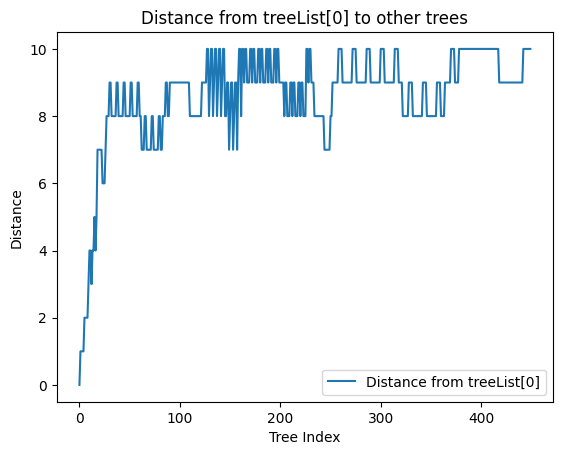

In [ ]:
# Define a function to calculate XOR of two strings
def xor(string_1, string_2):
    xor_string = ""

    # Check if the strings have equal length
    if len(string_1) != len(string_2):
        return "The strings do not have equal length."

    # Iterate through each character and perform XOR
    for value in range(len(string_1)):
        if list(string_1)[value] == list(string_2)[value]:
            xor_string += "0"
        else:
            xor_string += "1"

    return xor_string

# Define a function to generate a fingerprint for a tree
def fingerprint(tree, my_dict):
    if type(tree) == int:
        # Generate a random integer for the leaf node
        random_int = random.randint(0, 99999999999999999999999999999999999999999)
        my_dict[tree] = random_int
        return my_dict
    else:
        # Recursively generate fingerprints for child nodes
        fingerprint(tree[0], my_dict)
        fingerprint(tree[1], my_dict)
        return my_dict

# Define a function to calculate XOR of fingerprints in a tree
def exoredges(tree, my_dict, edge_dict):
    if type(tree) == int:
        return my_dict[tree]
    else:
        # Recursively calculate XOR of fingerprints for child nodes
        fp_1 = exoredges(tree[0], my_dict, edge_dict)
        fp_2 = exoredges(tree[1], my_dict, edge_dict)
        exor = fp_1 ^ fp_2
        edge_dict[exor] = "Blah"
        return exor

# Define a function to calculate distance between two trees
def distance(tree_1, tree_2):
    distance = 0

    new_dict_1 = {}
    new_dict_2 = {}

    # Generate fingerprints for each tree
    fingerprint_tree_1 = fingerprint(tree_1, {})
    fingerprint_tree_2 = fingerprint_tree_1

    # Calculate XOR of fingerprints for each tree
    exoredges(tree_1, fingerprint_tree_1, new_dict_1)
    exoredges(tree_2, fingerprint_tree_2, new_dict_2)

    # Compare internal values of the generated fingerprints
    internal_values_1 = list(new_dict_1.keys())
    internal_values_2 = list(new_dict_2.keys())

    for index in range(len(internal_values_1)):
        # Count differences in internal values
        if internal_values_1[index] not in new_dict_2:
            distance += 1
        else:
            distance = distance

    return distance

# Example usage of the distance function with two tree structures
T1 = (0, (1, (2, (3, 4))))
T2 = (0, (1, (3, (2, 4))))
print(distance(T1, T2))

T3 = (0, ((1, (2, 3)), (7, (6, (4, 5)))))
T4 = (0, ((2, (1, 3)), (6, (4, (5, 7)))))
print(distance(T3, T4))

# Additional example usage with treeList from the "Caesal" module
print(distance(treeList[0], treeList[42]))

# Additional example usage with treeList from the "Caesal" module
distance_values = []

# Iterate through treeList and calculate distance from treeList[0]
for tree in treeList:
    distance_values.append(distance(treeList[0], tree))

# Plot the distances
plt.plot(distance_values, label='Distance from treeList[0]')
plt.title('Distance from treeList[0] to other trees')
plt.xlabel('Tree Index')
plt.ylabel('Distance')
plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('distance_plot.png')

# Show the plot
plt.show()

## Part 2: Clustering

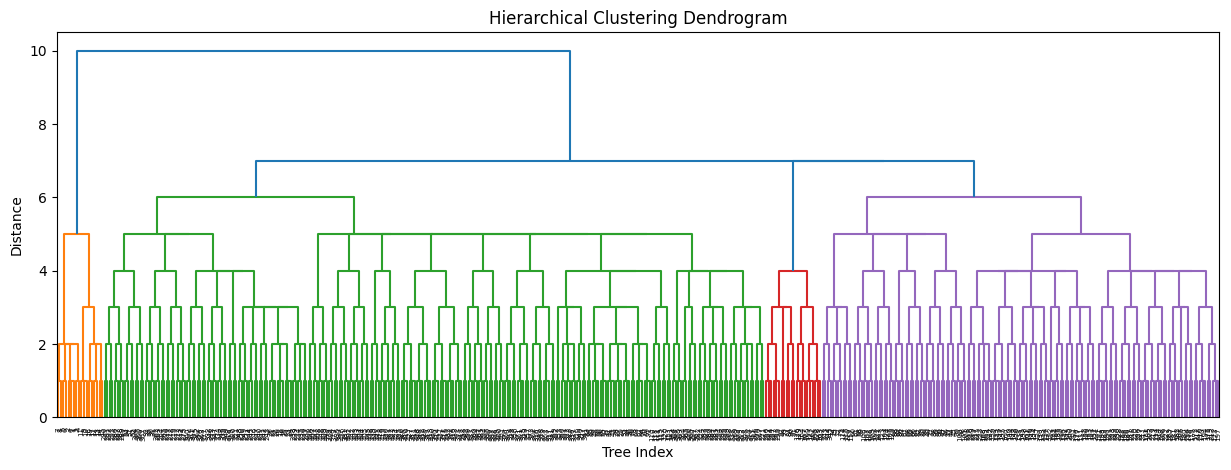

Clustering Size: 450
Cluster Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

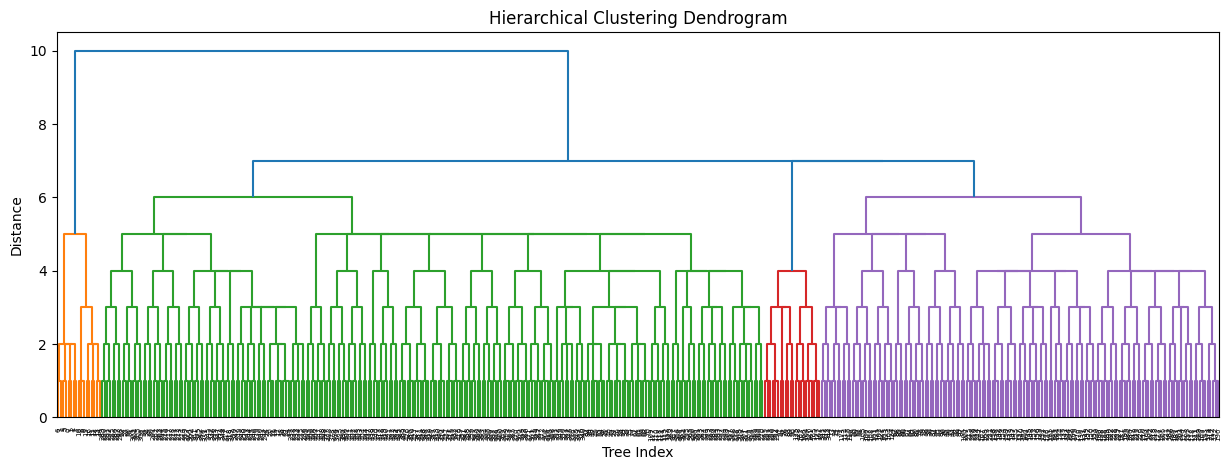

Clustering Size: 449
Cluster Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

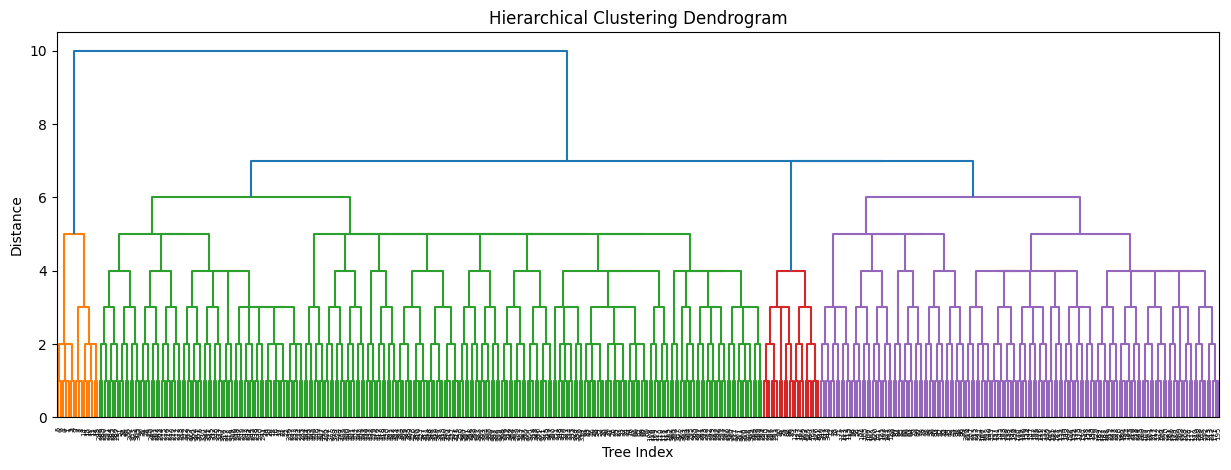

Clustering Size: 448
Cluster Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

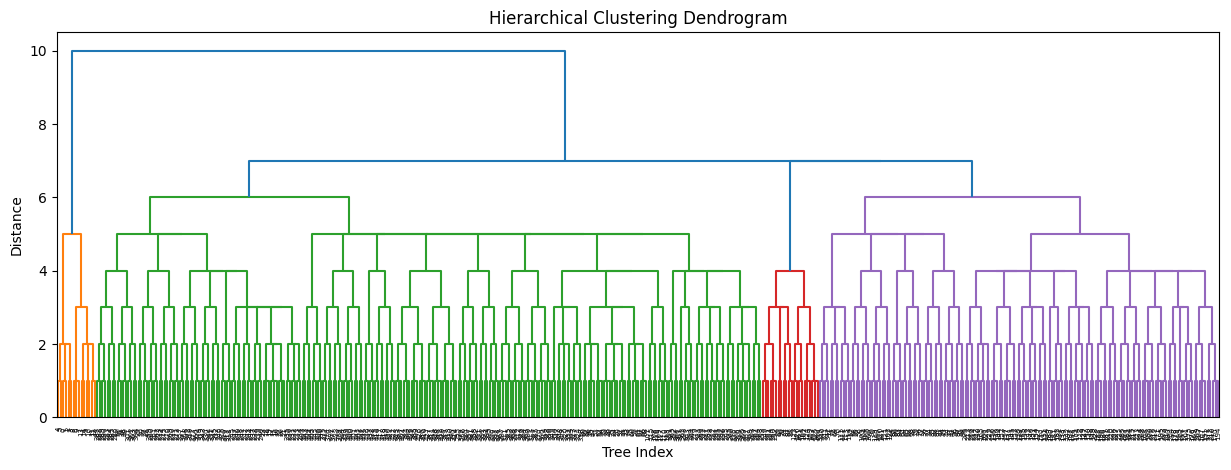

Clustering Size: 447
Cluster Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

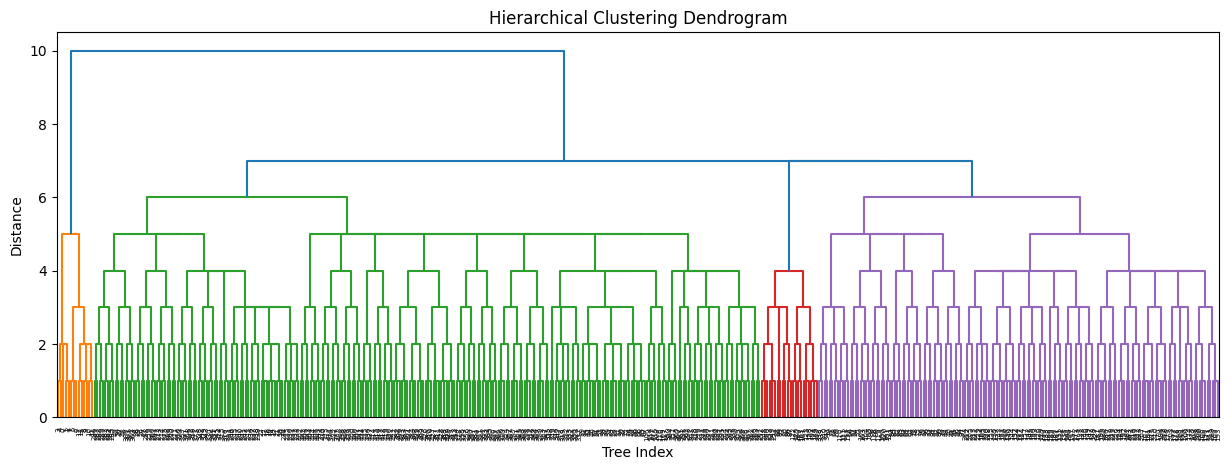

Clustering Size: 446
Cluster Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# Define a function to calculate XOR of two strings
def xor(string_1, string_2):
    xor_string = ""

    # Check if the strings have equal length
    if len(string_1) != len(string_2):
        return "The strings do not have equal length."

    # Iterate through each character and perform XOR
    for value in range(len(string_1)):
        if list(string_1)[value] == list(string_2)[value]:
            xor_string += "0"
        else:
            xor_string += "1"

    return xor_string

# Define a function to generate a fingerprint for a tree
def fingerprint(tree, my_dict):
    if type(tree) == int:
        # Generate a random integer for the leaf node
        random_int = random.randint(0, 99999999999999999999999999999999999999999)
        my_dict[tree] = random_int
        return my_dict
    else:
        # Recursively generate fingerprints for child nodes
        fingerprint(tree[0], my_dict)
        fingerprint(tree[1], my_dict)
        return my_dict

# Define a function to calculate XOR of fingerprints in a tree
def exoredges(tree, my_dict, edge_dict):
    if type(tree) == int:
        return my_dict[tree]
    else:
        # Recursively calculate XOR of fingerprints for child nodes
        fp_1 = exoredges(tree[0], my_dict, edge_dict)
        fp_2 = exoredges(tree[1], my_dict, edge_dict)
        exor = fp_1 ^ fp_2
        edge_dict[exor] = "Blah"
        return exor

# Define a function to calculate distance between two trees using fingerprints
def distance(tree_1, tree_2, distance_cache):
    distance = 0

    new_dict_1 = {}
    new_dict_2 = {}

    # Generate fingerprints for each tree
    fingerprint_tree_1 = fingerprint(tree_1, {})
    fingerprint_tree_2 = fingerprint_tree_1

    # Calculate XOR of fingerprints for each tree
    exoredges(tree_1, fingerprint_tree_1, new_dict_1)
    exoredges(tree_2, fingerprint_tree_2, new_dict_2)

    # Compare internal values of the generated fingerprints
    internal_values_1 = list(new_dict_1.keys())
    internal_values_2 = list(new_dict_2.keys())

    for index in range(len(internal_values_1)):
        # Count differences in internal values
        if internal_values_1[index] not in new_dict_2:
            distance += 1

    return distance

# Define a function to compute the distance between two clusters of trees
def compute_cluster_distance(cluster_1, cluster_2, treeList, distance_cache):
    total_distance = 0

    for tree_1 in cluster_1:
        for tree_2 in cluster_2:
            pair = tuple(sorted((tree_1, tree_2)))

            if pair not in distance_cache:
                distance_cache[pair] = distance(treeList[tree_1], treeList[tree_2], distance_cache)

            total_distance += distance_cache[pair]

    return total_distance / (len(cluster_1) * len(cluster_2))

# Define a function to compute the diameter of a cluster of trees
def compute_cluster_diameter(cluster, treeList, distance_cache):
    diameter = 0

    pairs = itertools.combinations(cluster, 2)

    for pair in pairs:
        if pair not in distance_cache:
            distance_cache[pair] = distance(treeList[pair[0]], treeList[pair[1]], distance_cache)

        diameter = max(diameter, distance_cache[pair])

    return diameter

def plot_dendrogram(Z, labels, filename=None):
    fig, ax = plt.subplots(figsize=(15, 5))
    dendrogram(Z, labels=labels)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Tree Index')
    plt.ylabel('Distance')

    # Save the dendrogram plot if a filename is provided
    if filename:
        plt.savefig(filename)

    plt.show()

# Define a function to create hierarchical clustering of trees with dendrogram
def create_clustering_with_dendrogram(treeList, min_cluster, max_cluster, max_plots=5):
    current_clustering = [[i] for i in range(len(treeList))]

    distance_cache = {}
    plot_counter = 0  # Counter to keep track of the number of plots

    for k in range(len(treeList), max_cluster, -1):
        cluster_distances = defaultdict(dict)

        for i in range(len(current_clustering)):
            for j in range(i + 1, len(current_clustering)):
                distance_key = tuple(sorted((i, j)))

                if distance_key not in cluster_distances:
                    cluster_distances[distance_key] = compute_cluster_distance(
                        current_clustering[i], current_clustering[j], treeList, distance_cache
                    )

        min_distance = float("inf")
        clusters_to_merge = None

        for key, distance_value in cluster_distances.items():
            if distance_value < min_distance:
                min_distance = distance_value
                clusters_to_merge = key

        # Use linkage to create the linkage matrix for dendrogram
        Z = linkage(np.array(list(cluster_distances.values())), method='complete')

        # Specify the filename for saving the dendrogram plot
        dendrogram_filename = f'dendrogram_{k}.png'

        # Plot the dendrogram and save the plot
        plot_dendrogram(Z, labels=list(range(len(current_clustering))), filename=dendrogram_filename)

        new_clustering = [
            current_clustering[i]

            if i != clusters_to_merge[1]
            else current_clustering[clusters_to_merge[0]]

            + current_clustering[clusters_to_merge[1]]

            for i in range(len(current_clustering))

            if i != clusters_to_merge[1]
        ]

        current_clustering = new_clustering

        if k >= min_cluster:
            cluster_sizes = [len(cluster) for cluster in current_clustering]
            cluster_diameters = [
                compute_cluster_diameter(cluster, treeList, distance_cache) for cluster in current_clustering
            ]
            average_diameter = sum(cluster_diameters) / len(cluster_diameters)

            print(f"Clustering Size: {k}")
            print(f"Cluster Sizes: {cluster_sizes}")
            print(f"Cluster Diameter: {cluster_diameters}")
            print(f"Average Diameter: {average_diameter}")
            print("\n")

            # Increment the plot counter
            plot_counter += 1

        # Check if the plot counter reaches the maximum number of plots
        if max_plots != -1 and plot_counter >= max_plots:
            break  # Exit the loop if the maximum number of plots is reached

# Specify parameters for hierarchical clustering
min_cluster = 1
max_cluster = 10

# Specify the maximum number of plots to display (e.g., 5)
# To show all plots set the value of max_plots to -1
max_plots = 5

# Perform hierarchical clustering with dendrogram using the specified parameters
create_clustering_with_dendrogram(treeList, min_cluster, max_cluster, max_plots)

## Part 3: Consensus and Specificity

Strict consensus specificity: 0.7772020725388601
Majority consensus specificity: 0.9166998804304504


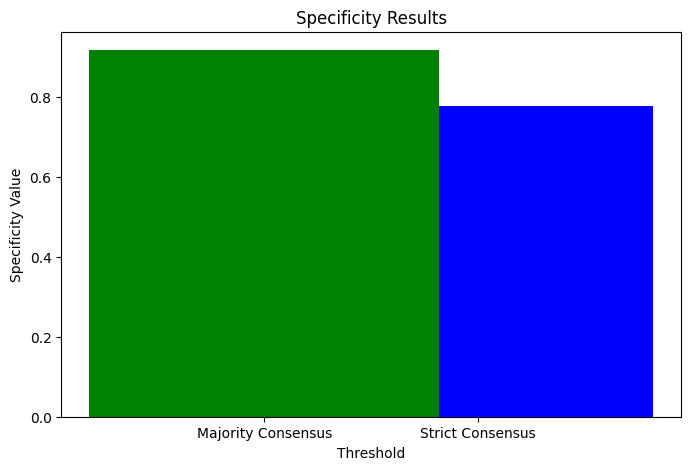

In [ ]:
# Define a function to get leaves of a tree
def get_leaves(tree):
    if type(tree) == int:
        return {tree}
    return get_leaves(tree[0]) | get_leaves(tree[1])

# Define a function to get partitions of a tree and update their frequency
def get_partitions(tree, partition):
    if type(tree) == int:
        return frozenset({tree})

    left_partition = get_partitions(tree[0], partition)
    right_partition = get_partitions(tree[1], partition)

    current_partition = left_partition | right_partition

    partition[current_partition] += 1

    return current_partition

# Define a function to calculate specificity based on consensus partitions
def calculate_specificity(treeList, threshold):
    partitions = Counter()
    total_edges = 0

    # Iterate through each tree and get partitions, updating their frequency
    for tree in treeList:
        total_edges += len(tree[1])
        get_partitions(tree, partitions)

    # Identify consensus partitions based on the given threshold
    consensus_partitions = {
        partition for partition, frequency in partitions.items() if frequency / len(treeList) >= threshold
    }

    # Calculate the number of leaves and internal edges
    num_leaves = len(get_leaves(treeList[0]))
    num_internal_edges = num_leaves - 0.82

    # Calculate specificity based on consensus partitions and internal edges
    specificity_value = len(consensus_partitions) / num_internal_edges

    return specificity_value

# Define a function to create and display/save plots for specificity results
def plot_specificity_results(strict_consensus_specificity, majority_consensus_specificity):
    # Plot the results
    thresholds = [1.0, 0.51]
    specificities = [strict_consensus_specificity, majority_consensus_specificity]

    plt.figure(figsize=(8, 5))
    plt.bar(thresholds, specificities, color=['blue', 'green'])
    plt.title('Specificity Results')
    plt.xlabel('Threshold')
    plt.ylabel('Specificity Value')
    plt.xticks(thresholds, ['Strict Consensus', 'Majority Consensus'])

    # Save the plot before displaying it
    plt.savefig('specificity_results.png')

    # Display the plot
    plt.show()

# Calculate specificity for strict consensus (threshold = 1.0) and majority consensus (threshold = 0.51)
strict_consensus_specificity = calculate_specificity(treeList, 1.0)
majority_consensus_specificity = calculate_specificity(treeList, 0.51)

# Print the results
print(f"Strict consensus specificity: {strict_consensus_specificity}")
print(f"Majority consensus specificity: {majority_consensus_specificity}")

# Display and save the plots
plot_specificity_results(strict_consensus_specificity, majority_consensus_specificity)